# **Aula 03 - Regressão**

In [0]:
import numpy as np
import os

#Para plotar imagens mais bonitinhas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Para conseguir reproduzir os resultados várias vezes ao longo das execuções
np.random.seed(42)

#Caminho definido para salvar as imagens
#Esse comando só funcionará se você estiver com o Google Drive montado
DIR = "/content/drive/My Drive/Colab Notebooks/Aula03_regressao/"

#Se a pasta ainda não foi criada, então vamos cria-la
if not os.path.isdir(DIR):
      os.makedirs(DIR)
      print("Criando pasta")

#Função para salvar as imagens na pasta
def salvar_figura(fig_id, tight_layout=True):
    path = os.path.join(DIR, fig_id + ".png")
    print("Salvando figura", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Regressão Linear**

$$
h_{\theta}(\bf{x}) = \hat{y} = \theta_0 + \theta_1x_1 + \dots + \theta_mx_m
$$

> A Função `rand()` do `numpy` gera valores aleatorios entre 0 e 1. Na célula de códgio abaixo, estamos criando uma matriz 100x1 com valores alteatórios, que ao multiplicarmos por 2, teremos valores entre 0 e 2, mas ainda com uma distribuição uniforme.

In [0]:
#Gerar dados sintéticos para X
X = 2 * np.random.rand(100,1)

> A função `randn()` gera valores aleatórios seguindo uma Distribuição Gaussiana com média 0 e desvio padrão igual 1. Então a código abaixo, representa os valores dos atributos alvos, alcançados a partir de uma função linear, cujos coeficientes são 4 e 3.

In [0]:
y = 4 + 3 * X + np.random.randn(100,1)

Salvando figura plot_dados_gerados


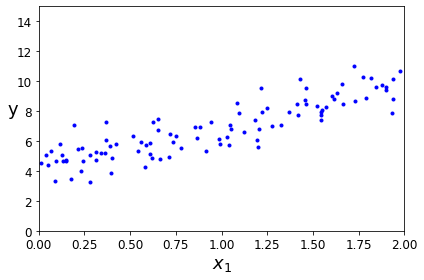

In [14]:
#Plotando os dados
plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation = 0, fontsize=18) 
plt.axis([0,2,0,15])
salvar_figura("plot_dados_gerados")
plt.show()

### **Equação Normal**

> Equação matemática para encontrar diretamente os valores de $\theta$:

> $$
\hat{\theta} = (\bf{X}^T \cdot \bf{X})^{-1} \cdot \bf{X}^T \cdot \bf{y}
$$

Como estamos trabalhando com funções na forma vetorial, precisamos criar uma nova coluna para a matriz `X` que representa os atributos do dataset. Essa coluna será para representar o $x_0$ que será multiplicado pelo termo bias $\theta_0$ na nossa Regressão Linear.

> Relembrando que a Regressão Linear pode ser representada com a função: $\hat{y} = \theta_0 x_0 + \theta_1 x_1$

> Para adicionarmos a coluna para reprentar $x_0$, usaremos `c_` para concatenar dois arrays e a função `ones()` que cria arrays completos com 1's

In [15]:
np.ones([3,2]) #retorna um array de 3 linhas e 2 colunas copletas com 1

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [16]:
a = [1,2,3]
b = [4, 5, 6]
print('a = ', a)
print("b = ", b)
np.c_[a, b] #concatena a com b

a =  [1, 2, 3]
b =  [4, 5, 6]


array([[1, 4],
       [2, 5],
       [3, 6]])

In [17]:
#Adicionar o x_0 = 1 a X
X_b = np.c_[np.ones((100,1)), X] #cria x_0 com 100 linhas e 1 coluna e concatena com X, nosso dataset
print("****5 primeiros elementos**** \n",X_b[:5]) #Mostra os 5 primeiros elementos do array
print("***mostra o intervalo de elementos****\n", X_b[3:8]) #Mostra os elementos do indice 3 ao indice 7

****5 primeiros elementos**** 
 [[1.         0.74908024]
 [1.         1.90142861]
 [1.         1.46398788]
 [1.         1.19731697]
 [1.         0.31203728]]
***mostra o intervalo de elementos****
 [[1.         1.19731697]
 [1.         0.31203728]
 [1.         0.31198904]
 [1.         0.11616722]
 [1.         1.73235229]]


> **Matriz Transposta**: 

$ A =
\begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix} 
A^T =
\begin{bmatrix}
  10 & 40 \\
  20 & 50 \\
  30 & 60
\end{bmatrix}$


No  NumPy, uma matriz transposta pode ser obtida usando o atributo `T`

In [18]:
#Transposta de X
X_b.T

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.  

> **Produto Escalar de Matrizes**:

> Uma matriz $Q$ de tamanho $m \times n$ pode ser multiplicada por outra matriz $R$ de tamanho $n \times q$. O resultado da multiplicação $P$ é uma matriz de tamanho $m \times q$ (mesmo número de linhas da primeira, pelo mesmo número de colunas da segunda), em que cada elemento é computado através da seguinte equação:

> $$
P_{i,j} = \sum_{k=1}^n{Q_{i,k} \times R_{k,j}}
$$

> O elemento da posição $i,j$ na matriz resultante é a soma dos produtos dos elementos da linha $i$ da matriz $Q$ pelos elementos da coluna $j$ da matriz $R$. Por exemplo:

> $Q = \begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix} 
R = \begin{bmatrix}
  2 & 3 & 5 & 7 \\
  11 & 13 & 17 & 19 \\
  23 & 29 & 31 & 37
\end{bmatrix} P = 
\begin{bmatrix}
  930 & 1160 & 1320 & 1560 \\
  2010 & 2510 & 2910 & 3450
\end{bmatrix}$

> Como é calculado, por exemplo, o primeiro elemento da matriz $P$: $10 \times 2 + 20 \times 11 + 30 \times 23$

In [19]:
10*2+20*11+30*23 #Exemplificando como é feito o calculo do primeiro elemento da matriz P

930

In [20]:
#Produto escalar
X_transposta = X_b.T
produto_escalar = X_transposta.dot(X_b)
produto_escalar
#Proderiamos fazer de forma direta
# X_b.T.dot(X_b)

array([[100.        ,  94.03614868],
       [ 94.03614868, 123.47395265]])

Abaixo segue a solução da matriz inversa, ou seja, a seguinte operação $(X^T \cdot X)^{-1}$

> Lembrando que a notação $A^{-1}$ representa o inverso da matriz A.

> Para calcular o inverso de uma matriz, podemos usar a função `inv()` da classe `linalg` do Numpy. A `linalg` possui diversas funções relacionadas a Algebra Linear.

> O retorno da função e a matriz inversa da matriz passada como parâmetro


In [0]:
#Matriz inversa
mtz_inversa = np.linalg.inv(X_b.T.dot(X_b))

Segue abaixo a resolução direto da Equação Normal, anteriormente estavamos resolvendo a equação por partes para entendermos as funções de Algebra Linear do Numpy.

> Lembrando que a fórmula da Equação Normal é a seguinte: $
\hat{\theta} = (\bf{X}^T \cdot \bf{X})^{-1} \cdot \bf{X}^T \cdot \bf{y}
$

> O resultado da Equação Normal, será o vetor de pesos $\theta$, no caso do nosso exemplo, como temos apenas um atributo, ela retornará o $\theta_0$ e o $\theta_1$.

In [22]:
#Equação Normal
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("theta_0: ", theta_best[0,0])
print("theta_1: ", theta_best[1,0])

theta_0:  4.21509615754675
theta_1:  2.7701133864384806


> Plotar predição alcançada pela Equação Normal

> Para plotar a reta que representa a nossa Regressão Linear, temos que pegar o menor e o maior valor possível de $x$. No nosso exemplo, seriam 0 e 2. Após isso, usamos a Regressão Linear para encontrar o $\hat{y}$ desses dois valores e conseguiremos plotar a reta.

In [23]:
# Criando o menor e o maior possível de x
X_new = np.array([[0],[2]])
X_new

array([[0],
       [2]])

In [24]:
#Adicionando x_0 = 1
X_new_b = np.c_[np.ones((2,1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

> Para encontrar o $\hat{y}$ (`y_pred`) basta multiplicar no $X_{new}$ (`X_new_b`) por $\theta$ (`theta_best`)

In [25]:
#Buscando as predições para esses dois valores de x
y_pred = X_new_b.dot(theta_best)
y_pred

array([[4.21509616],
       [9.75532293]])

Salvando figura plot_regressao_predicao


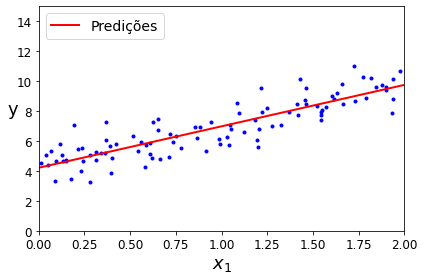

In [26]:
#Plotando a reta que representa a predição do modelo
plt.plot(X,y,"b.")
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Predições")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0,2,0,15])
salvar_figura("plot_regressao_predicao")
plt.show()

In [27]:
#Predição de outros valores
X_1 = np.array([[1, 1.25]])
y_pred_1 = X_1.dot(theta_best)
y_pred_1

array([[7.67773789]])

### Regressão Linear resolvida com Equação Normal no Scikit-Learn

In [28]:
#Importando e instanciando um modelo de Regressão Linear
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
#Treinando o modelo
linearRegression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

> Um modelo `LinearRegression` depois de treinado possui dois atributos:
  - `intercept_`, que retorna o bias $\theta_0$
  - `coef_`, que retorna os outros coeficientes de $\theta$

In [29]:
print("theta_0: ", linearRegression.intercept_)
print("theta_1: ", linearRegression.coef_)

theta_0:  [4.21509616]
theta_1:  [[2.77011339]]


In [30]:
theta_best # notem que o mesmo valor de intercept_ e coef_

array([[4.21509616],
       [2.77011339]])

In [0]:
#Fazendo a predição de todas as instâncias de X
y_pred = linearRegression.predict(X) 

In [32]:
#Calculando o MSE, que é a nossa função de custo.
from sklearn.metrics import mean_squared_error
mse_random = mean_squared_error(y, y_pred)
print("MSE dataset artificial: ",mse_random)


MSE dataset artificial:  0.8065845639670531


### Regressão Linear - Exemplos dados reais

> Vamos fazer a previsão do número de passageiros de uma companhia área. Para isso vamos:

> 1. importar o arquivo para nossa pasta.
> 2. importar o arquivo .csv para um Data Frame do Pandas
> 3. plotar os dados para ver se eles realmente possuem distribuição linear
> 4. dividir entre treino e teste, pode ser de forma aleatória usando `train_test_split` do Scikit-Learn
> 5. importar a Regressão Linear, treinar o modelo com a função `fit()` e obter as predições usando o a função `predict()`
> 6. plotar em um mesmo gráfico os valores preditos pelo seu modelo e os valores reais.
> 7. medir o erro do seu modelo.


In [0]:
import pandas as pd

In [34]:
# Importando arquivo csv para um data frame
passageiros_dataset = pd.read_csv(DIR + "Passageiros.csv")
passageiros_dataset.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


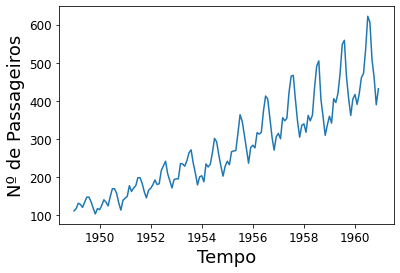

In [35]:
plt.plot(passageiros_dataset['tempo'], passageiros_dataset['nPassageiros'])
plt.xlabel("Tempo", fontsize=18)
plt.ylabel("Nº de Passageiros", fontsize=18)
plt.show()

In [36]:
#Seleciona todas as colunas menos a última
tempo_data_frame = passageiros_dataset.iloc[:,:-1]
tempo_data_frame.head()

,tempo
0,1949.000000
1,1949.083333
2,1949.166667
3,1949.250000
4,1949.333333


In [37]:
tempo = tempo_data_frame.values #retorna um array numpy
tempo[:5]

array([[1949.        ],
       [1949.08333333],
       [1949.16666667],
       [1949.25      ],
       [1949.33333333]])

In [38]:
#Outra forma de fazer o mesmo é usando a função drop, passando como parametro a coluna a ser excluida
# do data frame. axis = 1 representa que vamos excluir uma coluna, usamos axis = 0, para excluir linhas
nPassageiros = passageiros_dataset.drop('tempo', axis=1).values
nPassageiros[:5]

array([[112],
       [118],
       [132],
       [129],
       [121]])

In [0]:
#Dividir dataset em treino e teste
from sklearn.model_selection import train_test_split
X_treino_passageiros,  X_teste_passageiros, y_treino_passageiros, y_teste_passageiros = train_test_split(tempo, nPassageiros, test_size=0.3)

In [40]:
# Importar, treino e fazer predições usando Regressão Linear
from sklearn.linear_model import LinearRegression
lin_reg_passageiros = LinearRegression()
#treinando model
lin_reg_passageiros.fit(X_treino_passageiros, y_treino_passageiros)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
#Predição do dataset passageiros
y_pred = lin_reg_passageiros.predict(X_teste_passageiros)
y_pred

array([[114.33232195],
       [274.99171485],
       [111.60928139],
       [280.43779597],
       [193.30049812],
       [176.96225478],
       [356.68293159],
       [ 92.54799749],
       [310.39124211],
       [236.86914705],
       [291.3299582 ],
       [302.22212043],
       [383.91333716],
       [397.52853995],
       [163.34705199],
       [187.85441701],
       [299.49907987],
       [294.05299876],
       [375.74421549],
       [416.58982386],
       [245.03826872],
       [ 87.10191637],
       [345.79076936],
       [117.05536251],
       [332.17556657],
       [168.7931331 ],
       [476.49671613],
       [367.57509382],
       [364.85205326],
       [234.14610649],
       [351.23685047],
       [411.14374274],
       [468.32759445],
       [296.77603932],
       [424.75894553],
       [136.11664641],
       [196.02353868],
       [307.66820155],
       [283.16083653],
       [454.71239167],
       [473.77367557],
       [272.2686743 ],
       [378.46725605],
       [457

In [42]:
#Thetas encontrados pela Regressão Linear
print("theta_0: ", lin_reg_passageiros.intercept_)
print("theta: ", lin_reg_passageiros.coef_)

theta_0:  [-63599.37064817]
theta:  [[32.67648669]]


Para melhor visualização e comparação da predição em números, vamos criar um Data Frame dos dados de testes, onde a primeira coluna será o tempo, a segunda o número de passageiros reais e a terceira o número de passageiros preditos pelo nosso modelo de regressão linear.

No entanto, os nossos dados estão em formato de um array 2D. Usando a função `shape` do Numpy podemos ver o formato do array dos dados.

In [43]:
print("Formato da coluna tempo: ", X_teste_passageiros.shape)
print("Formato da coluna nº passageiros reais: ", y_teste_passageiros.shape)
print("Formato da coluna nº passageiros predito: ", y_pred.shape)

Formato da coluna tempo:  (44, 1)
Formato da coluna nº passageiros reais:  (44, 1)
Formato da coluna nº passageiros predito:  (44, 1)


Portanto, tempos uma array 2D, sendo 44 linhas e 1 coluna. Para criar um Data Frame precisamos usar arrays 1D. Para mudar a forma dos nossos arrays podemos usar tanto a função `reshape()`, quanto a `ravel()` do Numpy.

> `reshape()` muda a forma o array de acordo com parâmetros passados para função, desde que o tamanho do array seja o mesmo.


In [44]:
X_teste_passageiros.reshape(44) #para isso precisamos definir o formato do novo array que queremos

array([1949.83333333, 1954.75      , 1949.75      , 1954.91666667,
       1952.25      , 1951.75      , 1957.25      , 1949.16666667,
       1955.83333333, 1953.58333333, 1955.25      , 1955.58333333,
       1958.08333333, 1958.5       , 1951.33333333, 1952.08333333,
       1955.5       , 1955.33333333, 1957.83333333, 1959.08333333,
       1953.83333333, 1949.        , 1956.91666667, 1949.91666667,
       1956.5       , 1951.5       , 1960.91666667, 1957.58333333,
       1957.5       , 1953.5       , 1957.08333333, 1958.91666667,
       1960.66666667, 1955.41666667, 1959.33333333, 1950.5       ,
       1952.33333333, 1955.75      , 1955.        , 1960.25      ,
       1960.83333333, 1954.66666667, 1957.91666667, 1960.33333333])

> `ravel()` transforma qualquer forma de array em um array 1D

In [45]:
X_teste_passageiros.ravel()

array([1949.83333333, 1954.75      , 1949.75      , 1954.91666667,
       1952.25      , 1951.75      , 1957.25      , 1949.16666667,
       1955.83333333, 1953.58333333, 1955.25      , 1955.58333333,
       1958.08333333, 1958.5       , 1951.33333333, 1952.08333333,
       1955.5       , 1955.33333333, 1957.83333333, 1959.08333333,
       1953.83333333, 1949.        , 1956.91666667, 1949.91666667,
       1956.5       , 1951.5       , 1960.91666667, 1957.58333333,
       1957.5       , 1953.5       , 1957.08333333, 1958.91666667,
       1960.66666667, 1955.41666667, 1959.33333333, 1950.5       ,
       1952.33333333, 1955.75      , 1955.        , 1960.25      ,
       1960.83333333, 1954.66666667, 1957.91666667, 1960.33333333])

Agora podemos criar o nosso data frame, pois com a função `ravel()`, vamos remodelar nossos arrays para um formato 1D

In [46]:
X_teste_passageiros.ravel().shape

(44,)

In [48]:
#Criando um dataframe
df_passageiros = pd.DataFrame(
    {'Tempo': X_teste_passageiros.ravel(),
     'nPassageiros_reais': y_teste_passageiros.ravel(),
     'nPassageiros_predito': y_pred.ravel()})
df_passageiros.head()

,Tempo,nPassageiros_reais,nPassageiros_predito
0,1949.833333,104,114.332322
1,1954.750000,229,274.991715
2,1949.750000,119,111.609281
3,1954.916667,229,280.437796
4,1952.250000,181,193.300498


Salvando figura nPassageiros_predicoes


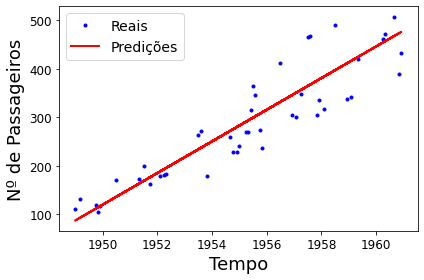

In [49]:
#Plotar os valores reais e os valores preditos
plt.plot(df_passageiros['Tempo'],df_passageiros['nPassageiros_reais'], 'b.', label='Reais')
plt.plot(df_passageiros['Tempo'],df_passageiros['nPassageiros_predito'], 'r-', linewidth=2, label='Predições')
plt.xlabel("Tempo", fontsize=18)
plt.ylabel("Nº de Passageiros", fontsize=18)
plt.legend(loc="upper left", fontsize=14)
salvar_figura("nPassageiros_predicoes")
plt.show()

In [50]:
#Medir o erro do modelo Regressão Linear com MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_teste_passageiros,y_pred)
mse 

2377.0138706119387

### **$R^2$**

> **Avaliando melhor o modelo com $R^2$** <br> 
 - Retorna valores entre 0 e 1
 - Quanto mais próximo de 1, melhor o modelo
 $$
 R^2 = 1 - \frac{\sum_{i=0}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=0}^{n} (y_i - \bar{y}_i)^2}
 $$

In [51]:
from sklearn.metrics import r2_score
r2 = r2_score(y_teste_passageiros, y_pred)
r2

0.8137902534776319

### **Gradiente Descendente para Regressão Linear**
> Cada iteração do Gradiente Descendente na vetorial: $$
\theta^{(proximo)} = \theta - \alpha \frac{2}{n}\bf{X}^T \cdot (\bf{X} \cdot \theta - \bf{y})
$$

In [52]:
alpha = 0.1 #taxa de aprendizado
iteracoes = 2000 # número de iterações até parar.
theta = np.random.randn(2,1) #Theta inicial (aleatorio)

for i in range(iteracoes):
  gradients = 2/X.shape[0] * X_b.T.dot(X_b.dot(theta) - y) #Calculando a derivada parcial da função de erro
  theta = theta - alpha * gradients #calculando o restante da operação e atualizando os pesos (theta)
  if i % 100 == 0: #a cada 100 iterações, mostrar o valor dos thetas e o erro.
    y_pred = X_b.dot(theta)
    print(" Iteração: ", i)
    print(f"theta0: {theta[0,0]} - theta1: {theta[1,0]} --> MSE: {mean_squared_error(y[:,0],y_pred[:,0])}") 
    print("=====================================")

 Iteração:  0
theta0: 0.8695366951059695 - theta1: 1.4063481701952472 --> MSE: 22.876696801299502
 Iteração:  100
theta0: 4.177017131609586 - theta1: 2.8037350965618337 --> MSE: 0.8070224939706654
 Iteração:  200
theta0: 4.213891152980198 - theta1: 2.7711773399729243 --> MSE: 0.806585002508278
 Iteração:  300
theta0: 4.215058025373729 - theta1: 2.770147055074592 --> MSE: 0.8065845644062068
 Iteração:  400
theta0: 4.215094950860351 - theta1: 2.770114451876984 --> MSE: 0.806584563967493
 Iteração:  500
theta0: 4.2150961193613545 - theta1: 2.7701134201541113 --> MSE: 0.8065845639670538
 Iteração:  600
theta0: 4.215096156338379 - theta1: 2.7701133875054085 --> MSE: 0.8065845639670534
 Iteração:  700
theta0: 4.21509615750851 - theta1: 2.770113386472246 --> MSE: 0.8065845639670531
 Iteração:  800
theta0: 4.215096157545538 - theta1: 2.7701133864395526 --> MSE: 0.8065845639670531
 Iteração:  900
theta0: 4.215096157546709 - theta1: 2.7701133864385183 --> MSE: 0.8065845639670534
 Iteração:  1000